## Project: What we can learn from visitors visiting Taiwan from 2011 to 2023

The original dataset is available from [Taiwan Tourism Bureau](https://stat.taiwan.net.tw/)

### Introduction:
The data was downloaded from Taiwan Tourism Bureau. It contains the monthly number of visitors to Taiwan by their gender, residence and purpose.

### Background:
Taiwan's travel and tourism industry plays a significant role in its economy, contributing to economic growth, job creation, and cultural exchange. The foreign exchange earnings from tourism for the year 2019 were estimated to be 14.41 billion US dollars, which was 4.43% of Taiwan's GDP. The total number of visitors to Taiwan in 2019 also reached an all-time-high record, 11.85 million.

The goal is to determine whether visitors to Taiwan are increasing, declining or being stagnant and to build a time series model that forecasts the future from the perspective of the past.

**In this notebook, we will focus on Pre-processing Work & Modeling.**

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Add the dataset from a csv file
total_by_month = pd.read_csv('../Data/total_by_month.csv')
total_by_month

,Period,Total
0,2011-01-01,373493
1,2011-02-01,422541
2,2011-03-01,502960
3,2011-04-01,533934
4,2011-05-01,455628
...,...,...
150,2023-07-01,541238
151,2023-08-01,588117
152,2023-09-01,536338
153,2023-10-01,618184


In [3]:
# Call the info method to see a summary of the data
total_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Period  155 non-null    object
 1   Total   155 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


There are 155 rows and 2 columns in this Pandas dataframe with no null values. We will furhter convert this dataframe into a series and with the `Period` column as the new index.

In [4]:
# Type conversion
total_by_month['Period'] = pd.to_datetime(total_by_month['Period'], format='%Y-%m-%d')
total_by_month.set_index('Period', inplace=True)
total_by_month

,Total
Period,
2011-01-01,373493
2011-02-01,422541
2011-03-01,502960
2011-04-01,533934
2011-05-01,455628
...,...
2023-07-01,541238
2023-08-01,588117
2023-09-01,536338


In [5]:
# Making a predictor variable y
y = total_by_month['Total']
type(y)

pandas.core.series.Series

In [6]:
# Get a summary statitics for y
y.describe()

count    1.550000e+02
mean     6.057653e+05
std      3.483379e+05
min      2.555000e+03
25%      4.305340e+05
50%      6.913320e+05
75%      8.660075e+05
max      1.142198e+06
Name: Total, dtype: float64

/Users/sonic64/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sonic64/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sonic64/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sonic64/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

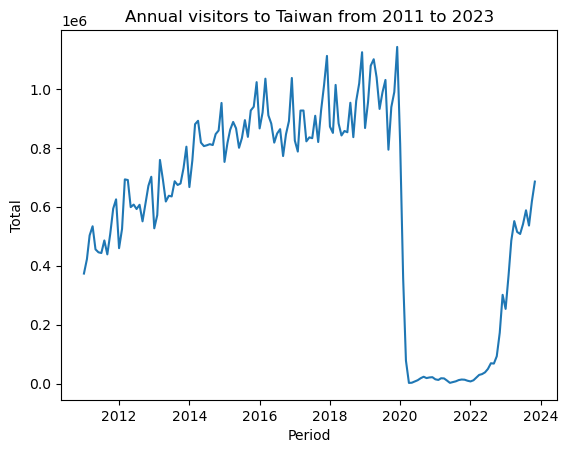

In [7]:
# Plot the data
_ = sns.lineplot(x=y.index, y =y)
plt.title('Annual visitors to Taiwan from 2011 to 2023')
plt.show()

In our previos EDA, we already learned that there is a upward trend in visitors to Taiwan from 2011 to 2023 despite a drastic downturn in 2020 due to the Covid-19. There is also a seasonal pattern in the total number of visitors with a repeated pattern. Because the general trend does not increase at a steady speed and the amplitude of seasonal fluctuations gets bigger as time progresses, our data should be multiplicative.

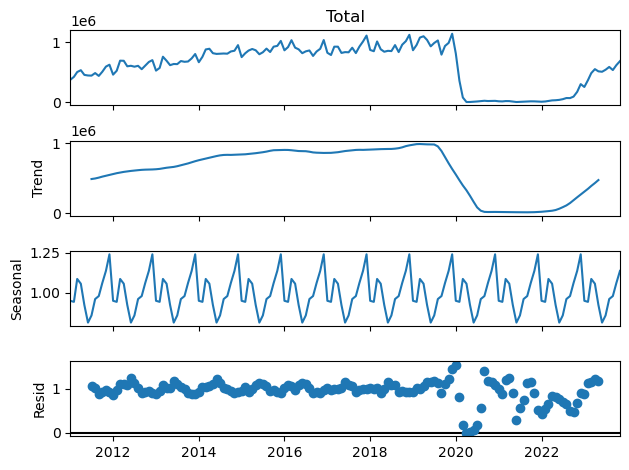

In [8]:
# Decomposition
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')

# Plot the original data, the trend, the seasonality, and the residuals 
decomposition.plot()
plt.show()

We have to assess stationarity when performing time series analysis. A time series dataset is deemed stationary when its statistical characteristics remain constant over time, which means the series exhibits a consistent mean, variance, and covariance.

KPSS is one of the most widely used methods for testing stationarity. The null hypothesis of the KPSS test suggests that the examined time series data is stationary. Therefore, if the p-value falls below the chosen significance level (typically 0.05), we reject the null hypothesis and conclude that the data lacks stationarity.

In [9]:
# Testing for stationarity with KPSS
from statsmodels.tsa.stattools import kpss
kpss(y)

(0.5936458037914313,
 0.02321401783714261,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Since our p-value is less than 0.05, we should reject the Null hypothesis and deduce the non-stationarity of our data. However, we need our data to be stationary before building a predictive model.

Alternatively, we can check stationarity using the Dicky-Fuller test. The Null hypothesis of this test is that the time series data has a unit root, indicating it is non-stationary. If the *p*-value is less than the significance level, we reject the Null and infer that the data is stationary. Keep in mind that **a significant *p*-value means stationary in `adfuller()` but opposite in `kpss()`.**

In [10]:
# Testing for stationarity with Dicky-Fuller
from statsmodels.tsa.stattools import adfuller
adfuller(y)

(-1.7986894725554248,
 0.38111252795536904,
 13,
 141,
 {'1%': -3.4776006742422374,
  '5%': -2.882265832283648,
  '10%': -2.5778219289774156},
 3564.7780652438382)

Since our p-value is larger than 0.05, we could not reject the Null hypothesis and deduce the non-stationarity of our data, which is consistent with KPSS.

<Axes: xlabel='Period'>

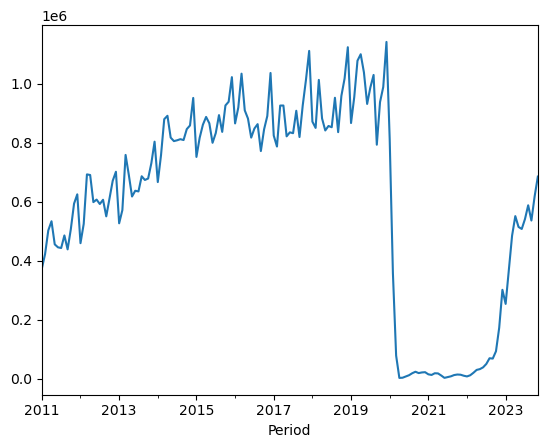

In [11]:
# Plot the data
y.plot()

It is evident that both the mean and variance increase over time, which suggests that our data lacks a consistent mean and variance. As a result, we will have to transform our data and make it stationary.

<Axes: xlabel='Period'>

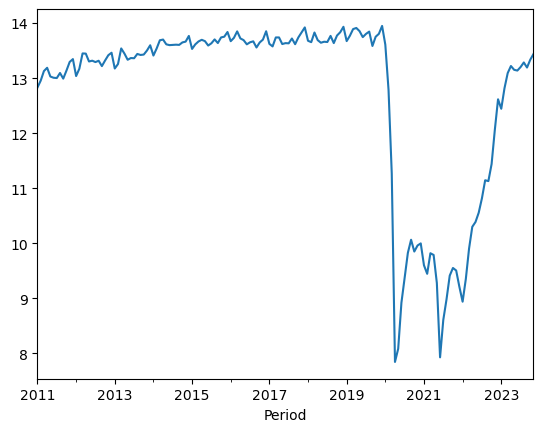

In [12]:
# Natural log transformation
y_log = np.log(y)
y_log.plot()


We can see that the variance in our data now remains more contant over time than that before transformation.

In [13]:
# Testing for stationarity with KPSS after natural log transformation
kpss(y_log)

(0.6956744098051777,
 0.013938690017711117,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Although we have a constant variance, we also need a constant mean. At this moment, our p-value of KPSS test is still less than 0.05, indicating non-stationarity.

We can achieve a constant mean by differencing our data. Differencing involves creating a new time series that represents the difference between consecutive values in our existing dataset.

We can use the `diff()` function for this purpose. It is important to note that the resulting differenced series will have one less value than our original dataset.


In [14]:
# Test
kpss(y.diff().dropna())

/var/folders/4s/dkhgvddx5kb346fv_thq5bqh0000gn/T/ipykernel_92489/230438286.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(y.diff().dropna())


(0.1230696305245753,
 0.1,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [15]:
adfuller(y.diff().dropna())

(-2.878531054616812,
 0.04790210870413095,
 12,
 141,
 {'1%': -3.4776006742422374,
  '5%': -2.882265832283648,
  '10%': -2.5778219289774156},
 3541.1709660069637)

In [16]:
# Differencing by using diff() function
y_log.diff()

Period
2011-01-01         NaN
2011-02-01    0.123387
2011-03-01    0.174224
2011-04-01    0.059762
2011-05-01   -0.158596
                ...   
2023-07-01    0.063815
2023-08-01    0.083067
2023-09-01   -0.092161
2023-10-01    0.142022
2023-11-01    0.103303
Name: Total, Length: 155, dtype: float64

/var/folders/4s/dkhgvddx5kb346fv_thq5bqh0000gn/T/ipykernel_92489/2324392966.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(y_log.diff().dropna())


(0.10228302901800786,
 0.1,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

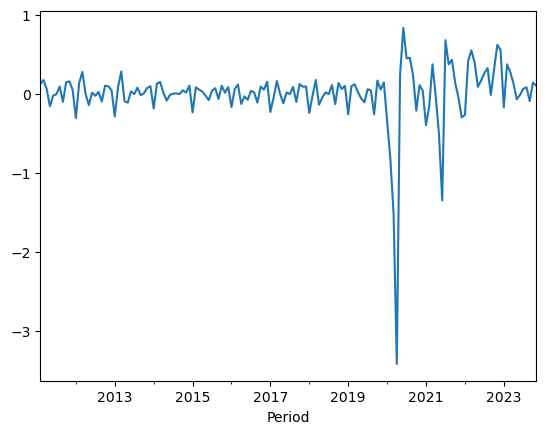

In [17]:
# Testing for stationarity with KPSS after natural log transformation and differencing
y_log.diff().dropna().plot()
kpss(y_log.diff().dropna())

Our p-value is now greater than 0.05, so we can accept the null hypothesis that our data is stationary.

In [18]:
# Testing for stationarity with Dicky-Fuller after natural log transformation and differencing
adfuller(y_log.diff().dropna())

(-8.216370141821004,
 6.607429612093402e-13,
 1,
 152,
 {'1%': -3.474120870218417,
  '5%': -2.880749791423677,
  '10%': -2.5770126333102494},
 126.98742877512208)

When we use `adfuller()`, p-value is much smaller than 0.05, suggesting that we could reject the Null hypothesis and our data is stationary (not a random walk). In this case since both tests indicate stationarity, the series can be deemed to be trend-stationary. Trend-stationarity implies difference-stationarity, but the reverse is not necessarily true. Keep in mind that if the KPSS test indicates stationarity and the Dicky-Fuller test indicates non-stationarity, it's a sign that the series is only difference-stationary. 

Using both tests ensures us that we avoid misinterpreting the type of stationarity or the presence of a trend in the data. In practice, the goal is often to make the data either difference-stationary, trend-stationary, or both, depending on the characteristics of the time series. Many time series models, like the popular ARIMA (AutoRegressive Integrated Moving Average) model, are designed to work with difference-stationary data. These models often involve differencing the original series to achieve stationarity.

In [19]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

In order to generate an ARIMA model, we have to estimate the order of the model. There are multiple ways to find good parameters of our model, e.q. using Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to choose model order. However, ACF and PACF rarely gave us a conclusive model choice in my experience and we should always loop over multiple parameters to find the best model order. Herein, we will try the following two ways to identify the optimal order of an ARIMA model. 

The first method is to calculate the root mean squared error (RMSE) between our predictions and true values. We implemented the one-step approach to calculate RMSE because it provides a more dynamic and accurate measure of the model's performance in a real-world scenario. In this approach, predictions are made, true values are observed, and subsequent predictions are then generated. The resulting RMSE calculated through this method offers a potentially more precise representation of the model's out-of-sample performance, capturing the nuances of the prediction-observation process in a dynamic setting. 

In [20]:
# Make a function to calculate RMSE and MAE of a single ARIMA model
def RMSE_MAE (data, ARIMA_order):
    split = int(len(data)*0.8)
    y_train, y_test = data[:split], data[split:]
    y_pred = []
    y_train = list(y_train)
    #timestep-wise comparison between test data and one-step prediction ARIMA model.
    for i in range(len(y_test)):
        model = ARIMA(y_train, order=ARIMA_order)
        result = model.fit()
        future = result.forecast()[0]
        y_pred.append(future)
        y_train.append(y_test[i])
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return [rmse, mae]

In [21]:
# Make a function to evaluate different ARIMA models with different p, d, and q values by using RMSE and MAE
def ARIMA_eval_RMSEMAE (data, p_values, d_values, q_values): 
    order_RMSE_MAE=[]
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                # We use try here because we want to skip some orders that could cause non-stationary and lead to a fit error
                try:
                    score = RMSE_MAE(data, order)
                    order_RMSE_MAE.append((p, d, q, score[0], score[1]))
                except:
                    order_RMSE_MAE.append((p, d, q, None, None))
    order_df = pd.DataFrame(order_RMSE_MAE, columns=['p','d','q','RMSE','MAE'])
    return order_df.sort_values(by='RMSE', ascending=True).reset_index(drop=True).style.highlight_min(color='lightgreen', axis=0, subset=['RMSE','MAE'])

The other tool is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. The main difference between AIC and BIC is how much they penalize the complexity of our model. AIC is often preferred when we have a larger sample size and are willing to accept slightly more complex models, while BIC is favored when we have a smaller sample size or when we want to strongly favor simplicity. 

In [22]:
# Make a function to evaluate different ARIMA models with different p, d, and q values by comparing AIC and BIC
def ARIMA_eval_AICBIC (data, p_values, d_values, q_values): 
    order_aic_bic=[]
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                # We use try here because we want to skip some orders that could cause non-stationary and lead to a fit error
                try:
                    model = ARIMA(data, order=order)
                    results = model.fit()
                    order_aic_bic.append((p, d, q, results.aic, results.bic))
                except:
                    order_aic_bic.append((p, d, q, None, None))
    order_df = pd.DataFrame(order_aic_bic, columns=['p','d','q','AIC','BIC'])
    return order_df.sort_values(by='BIC', ascending=True).reset_index(drop=True).style.highlight_min(color='lightgreen', axis=0, subset=['AIC','BIC'])

In [23]:
# Create a list of values of each ARIMA parameter
p_values = [0,1,2]
d_values = [0,1,2]
q_values = [0,1,2]

In [24]:
# Optimize ARIMA model by RMSE and MAE
import warnings
warnings.filterwarnings("ignore")
ARIMA_eval_RMSEMAE(y_log, p_values, d_values, q_values)

,p,d,q,RMSE,MAE
0,1,0,1,0.391368,0.278261
1,2,1,0,0.391819,0.274175
2,1,0,2,0.392018,0.275629
3,1,1,2,0.392146,0.280457
4,0,1,1,0.392511,0.271685
5,2,0,1,0.393123,0.277563
6,2,0,2,0.393572,0.276327
7,2,0,0,0.394184,0.272147
8,1,1,0,0.394255,0.275950
9,1,1,1,0.395430,0.272585


ARIMA(1, 0, 1) model has the lowest RMSE, 0.39137, while ARIMA(0, 1, 1) model has the lowest MAE, 0.27169.

In [25]:
# Optimize ARIMA model by AIC and BIC
ARIMA_eval_AICBIC (y_log, p_values, d_values, q_values)

,p,d,q,AIC,BIC
0,0,1,1,126.352402,132.426307
1,1,1,0,128.740083,134.813988
2,2,1,0,127.049990,136.160847
3,0,1,2,128.064826,137.175684
4,1,1,1,128.162109,137.272966
5,2,1,1,128.188567,140.336377
6,1,0,1,129.629363,141.803064
7,0,2,2,132.958039,142.049353
8,1,1,2,130.056610,142.204420
9,2,0,0,131.081584,143.255285


When we apply an AIC-BIC order search, the best p, d, q parameters for our ARIMA model are 0, 1, 1, which is consistent with the previous MAE approach. Keep in mind that AIC and BIC both favored the same model ARIMA(0, 1, 1) in this scenario, but this won't always be the case. 

We further examine the RMSE of this particular ARIMA(0, 1, 1) model, of which the RMSE is 0.39251 and quite comparable to the ARIMA(1, 0, 1) model. Given that MAE, AIC and BIC all favor the same model ARIMA(0, 1, 1), we will use the order (0, 1, 1) to build an ARIMA model and take a look at a summary of the model this library has built around our data.

In [26]:
# Build a single ARIMA model with the best parameter
p=0
d=1
q=1
model = ARIMA(y_log, order=(p,d,q))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                  155
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -61.176
Date:                Fri, 26 Jan 2024   AIC                            126.352
Time:                        11:54:11   BIC                            132.426
Sample:                    01-01-2011   HQIC                           128.820
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3668      0.030     12.290      0.000       0.308       0.425
sigma2         0.1295      0.004     30.729      0.000       0.121       0.138
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6311.40
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              21.79   Skew:                            -3.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Based on the summary p-value of Ljung-Box (L1) test, we cannot reject the null hypothesis of the test and should accept that there is no autocorrelation in the residuals of the time series. The L1 test is particularly employed to evaluate whether the residuals (or errors) of a time series model exhibit significant autocorrelation. If significant autocorrelations are detected, it indicates that there may be room for improvement in the model.

However, the p-value of the Jarque-Bera (JB) test in the summary is exactly zero, it typically indicates that the data's distribution significantly deviates from a normal distribution. The JB test is a statistical test for assessing the skewness and kurtosis of a sample, and it is often used to check the normality assumption of the residuals in a regression or time series model.

We can further examine other diagnostic plots and tests for residuals using `plot_diagnostics()`.

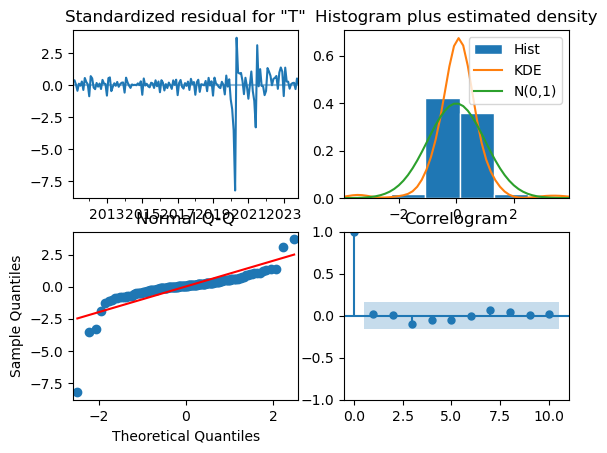

In [27]:
result.plot_diagnostics()
plt.show()

The histogram and Q-Q plots indeed both show that the residuals from our ARIMA model do not follow a normal distribution. Typically, if the residuals are not normally distributed, we would consider revisiting the model and applying transformations to remove outliers. In this case, we acknowledge that the deviation was caused by an unprecedented and dramatic downturn in data, namely the onset of the global pandemic in early 2020. These sudden and unforeseen events pose a challenge to ARIMA, as the model struggles to effectively handle such extraordinary disruptions.

ARIMA models assume that the residuals are normally distributed. If the residuals are significantly non-normal, it may compromise the reliability of the model's parameter estimates and predictions. While ARIMA models are generally robust to departures from normality, severe deviations, akin to the impact of the COVID-19 outbreak, may considerably distress the model.

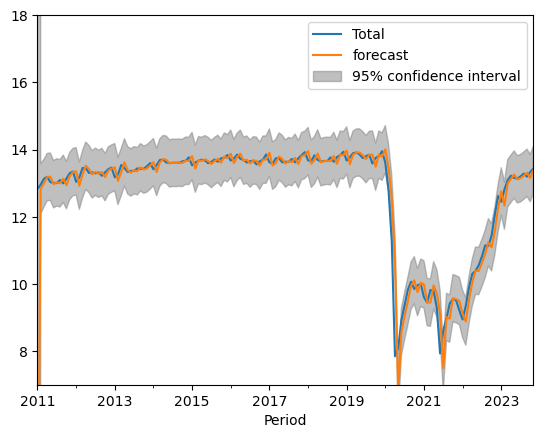

In [28]:
# Visualize the original dataset plotted against our model
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
y_log.plot(ax=ax)
plot_predict(result, start='2011', end='2023', ax=ax)
plt.ylim(7, 18)
plt.show()

It seems that our model fits tightly to our existing data. We will further use it to forecast the number of future visitors.

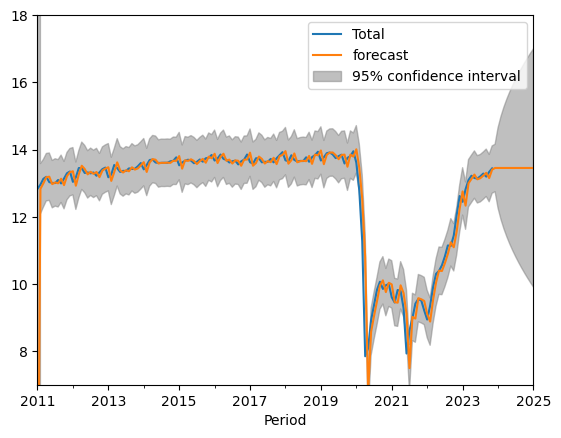

In [29]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
prediction = result.forecast(24)

# Convert that range into a dataframe that includes your predictions
df = pd.DataFrame(prediction)

# Plot your future predictions
# Keep in mind that MA(1) forecasts more than one period in the future are simply the mean of the sample.
fig, ax = plt.subplots()
y_log.plot(ax=ax)
plot_predict(result, start='2011', end='2025', ax=ax)
plt.ylim(7, 18)
plt.show()